<a href="https://colab.research.google.com/github/daniel-elesbao/BasesComputacionais/blob/master/ProjetoBCCDanielZamboniElesb%C3%A3oeLuizHenriquedaSilva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto Final da Disciplina Bases Computacionais da Ciência Q3.2022 21h
Estudo 

Daniel Zamboni Elesbão - RA: 11202230222

Luiz Henrique da Silva - RA: 11202231412

In [ ]:
#Estudo estatístico comparativo entre o Índice de Desenvolvimento Humano (IDH ou HDR na sigla em inglês) das 
#Nações Unidas e o Índice de Percepção da Corrupção (CPI) da Transparência Internacional
#Projeto com inspiração na disciplina 'Estado e Relações de Poder'
import matplotlib.pyplot as plt #importa a biblioteca mathplotlib como plt
import pandas as pd #importa a biblioteca pandas como pd
hdr21 = pd.read_csv('https://raw.githubusercontent.com/daniel-elesbao/BasesComputacionais/master/HDR21-22_Composite_indices_complete_time_series2.csv')
#Lê o CSV com o ranking do Índice de Desenvolvimento Humano das Nações Unidas de 2021
cpi21 = pd.read_excel('https://raw.githubusercontent.com/daniel-elesbao/BasesComputacionais/master/CPI2021_GlobalResults&Trends.xlsx')
#Lê planilha Excel com o índice de percepção de corrupção da transparência internacional de 2021
cpi21 = cpi21.drop(labels=[0,1], axis=0) #remove as duas primeiras linhas do DataFrame, sem dados relevantes
cpi21 = cpi21.rename(columns={'Unnamed: 1': 'ISO3','Unnamed: 3': 'CPI'}) #renomeia as colunas com as informações relevantes
descor = pd.merge(cpi21, hdr21, left_on='ISO3', right_on='iso3') #funde os Dataframes alinhando os dados dos países pela padronização do nome ISO3
descor = descor[['ISO3','CPI','iso3','hdi_rank_2021']] #remove todas as colunas exceto as que tem as informações relevantes para o escopo do projeto

display (descor)

,ISO3,CPI,iso3,hdi_rank_2021
0,DNK,88,DNK,6.0
1,FIN,88,FIN,11.0
2,NZL,88,NZL,13.0
3,NOR,85,NOR,2.0
4,SGP,85,SGP,12.0
...,...,...,...,...
170,AFG,16,AFG,180.0
171,YEM,16,YEM,183.0
172,VEN,14,VEN,120.0
173,SYR,13,SYR,150.0


Margens de erro da reta: MAE = 29.78
Margens de erro da reta: RMSE = 35.89


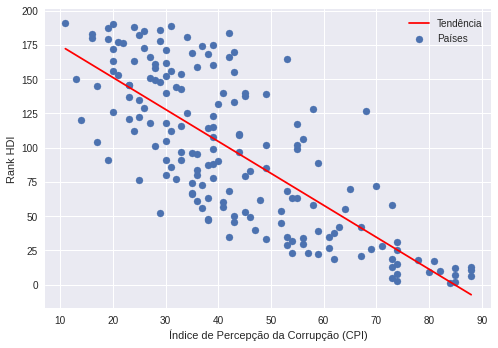

In [ ]:
import pandas as pd #importa a biblioteca pandas como pd
import numpy as np #importa a biblioteca numpy como np
import matplotlib.pylab as plb #importa a biblioteca mathplotlib como plt

X = descor["CPI"].values #Coluna CPI da tabela usada como coordenada X
Y = descor["hdi_rank_2021"].values #Coluna hdi_rank da tabela usada como coordenada Y

media_X = np.mean(X) # média do X
media_Y = np.mean(Y) # média do Y
erro_x = X-media_X # Cálculo dos erros de X
erro_y = Y-media_Y # Cálculo dos erros de Y
soma_erro_xy = np.sum(erro_x*erro_y) # Somando o produto dos erros (faz parte da formula)
erro_x_quadratico = (X-media_X)**2.0 # Encontrando o x quadratico (faz parte da formula)
soma_erro_x_quadratico = np.sum(erro_x_quadratico) # Soma para ter o denominador completo (faz parte da formula)
m = soma_erro_xy / soma_erro_x_quadratico # formula anteriormente mencionada (coeficiente angular)
c = media_Y - m*media_X  # Formula para coeficiente linear
reta = m*X+c # Equação usando os coeficientes anteriormente calculados para chegar na reta

plt.scatter(X,Y,label='Países'); # Países separados por pontos no grafico 
plt.plot(X,reta,label='Tendência',color='red'); # Ajuste linear
plt.xlabel('Índice de Percepção da Corrupção (CPI)'); # Da um titulo ao X 
plt.ylabel('Rank HDI'); # Da um titulo ao Y 
plt.legend(); # Insere legenda no grafico

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error #importa a biblioteca numpy como mean_absolute_error e mean_squared_error
MAE = mean_absolute_error(Y,reta) # Cálculo da margem de erro da reta
RMSE = np.sqrt(mean_squared_error(Y,reta)) # Cálculo da margem de erro da reta
print("Margens de erro da reta: MAE = {:0.2f}".format(MAE))
print("Margens de erro da reta: RMSE = {:0.2f}".format(RMSE))

Margens de erro da reta: MAE = 29.78
Margens de erro da reta: RMSE = 35.89


Dados internacionais para o projeto
https://www.transparency.org/en/cpi/2021
https://hdr.undp.org/data-center